# Ejercicio 1

En https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv y https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv están datasets de la situación epidemiológica y sanitaria relacionada con el covid en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).

Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadísitico como si fuesen valores continuos.

¿Hay variables que puedan ser razonablemente consideradas normales? 
¿Hay variables que tienen un comportamiento sospechoso?

Cargar el dataframe, hacer un histograma y ver si hay gaussiana o no y por qué e intentar identificar si hay comportamiento sospechoso, algo que llama la atención. Simplemente hacer un análisis exploratorio, observar la contextura del dataset y sus variables.

In [1]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

# realizar solicitudes web desde una URL
import requests

In [2]:
# Leemos los archivos y los guardo en dataframes
file_casos = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv')
file_camas = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv')
casos = pd.DataFrame(data=file_casos)
camas = pd.DataFrame(data=file_camas)
# Comienzo por analizar el dataframe casos
casos.describe()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0


In [3]:
casos.head()

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0


In [4]:
# a ver qué tipos de datos son
casos.dtypes

fecha                                object
confirmados                           int64
activos                               int64
recuperados                           int64
decesos                               int64
descartados                           int64
sospechosos                           int64
contencion_psicologica                int64
monitoreo_epidemiologico              int64
aislamiento_por_contacto_estrecho     int64
aprehendidos                          int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


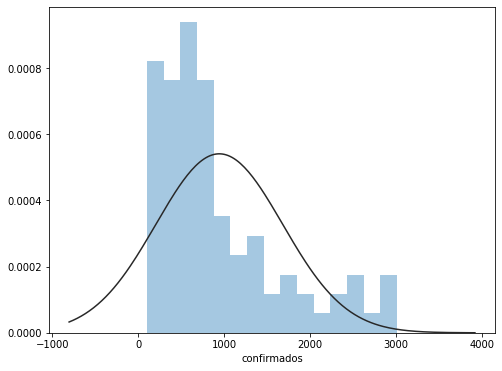

In [5]:
#Entonces ahora quiero hacer un histograma de algún atributo, por ejemplo "confirmados"
from scipy.stats import norm
plt.figure(figsize=(8,6))
sns.distplot(casos['confirmados'], fit=norm , kde=False, bins=15)

Se puede ver en el histograma de los casos confirmados que éstos no siguen una distribución normal. Esto puede deberse a que se trata de una variable acumulativa. Primero me interesa ver cómo se comporta la curva de confirmados en función de los días:

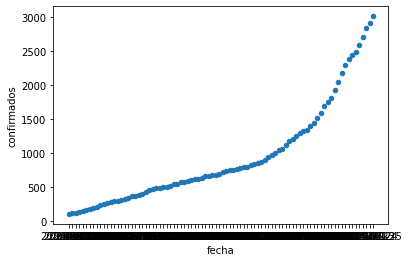

In [6]:
casos.plot.scatter(x="fecha",y="confirmados")

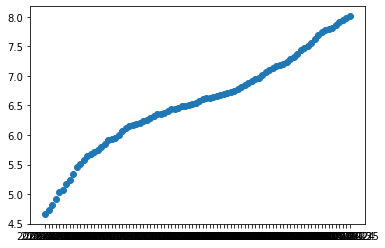

In [7]:
# Aplico el logritmo a la varibale "y" en busca de comportamientos lineales
plt.scatter(x=casos["fecha"],y=np.log(casos["confirmados"]))

Vemos que el último tercio de la curva se comporta exponencialmente, dado que al realizar el logaritmo sobre la variable "y" esta parte es aproximadamente lineal. Ahora estaría bueno ir viendo cómo cambia si se cuentan los casos confirmados por día.

In [8]:
confirmados_por_dia = pd.Series(casos["confirmados"])
# calculo la cantidad de confirmados por día
for i in range(87,0,-1):
  confirmados_por_dia[i] = confirmados_por_dia[i] - confirmados_por_dia[i-1]
  #print(i)
confirmados_por_dia

0     106
1       8
2      10
3      13
4      17
     ... 
83    102
84    125
85    127
86     65
87    106
Name: confirmados, Length: 88, dtype: int64

In [9]:
# saco la primer fila
confirmados_por_dia = confirmados_por_dia[1:88]
confirmados_por_dia

1       8
2      10
3      13
4      17
5       5
     ... 
83    102
84    125
85    127
86     65
87    106
Name: confirmados, Length: 87, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


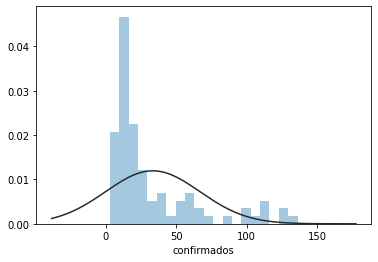

In [10]:
# Ahora realizo el histograma de la cantidad de confirmados por día
sns.distplot(confirmados_por_dia, fit=norm , kde=False, bins=20)

De todas formas, vemos que la cantidad de confirmados por día no sigue una distribución normal. También me interesa ver cómo se comporta la curva de confirmados por día en función de los días.

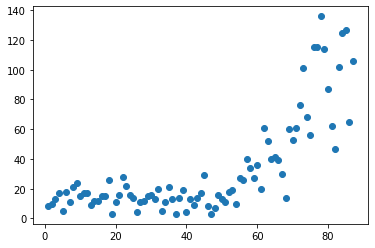

In [11]:
dias = []
for i in range(1,88):
  dias = dias + [i]
plt.scatter(x=dias,y=confirmados_por_dia)

Aquí podemos observar cómo la cantidad de confirmados por día se mantuvo aproximadamente constante los primeros 45 días para luego aumentar de manera exponencial.

Procedo a realizar el mismo análisis con las demás variables del dataFrame casos.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

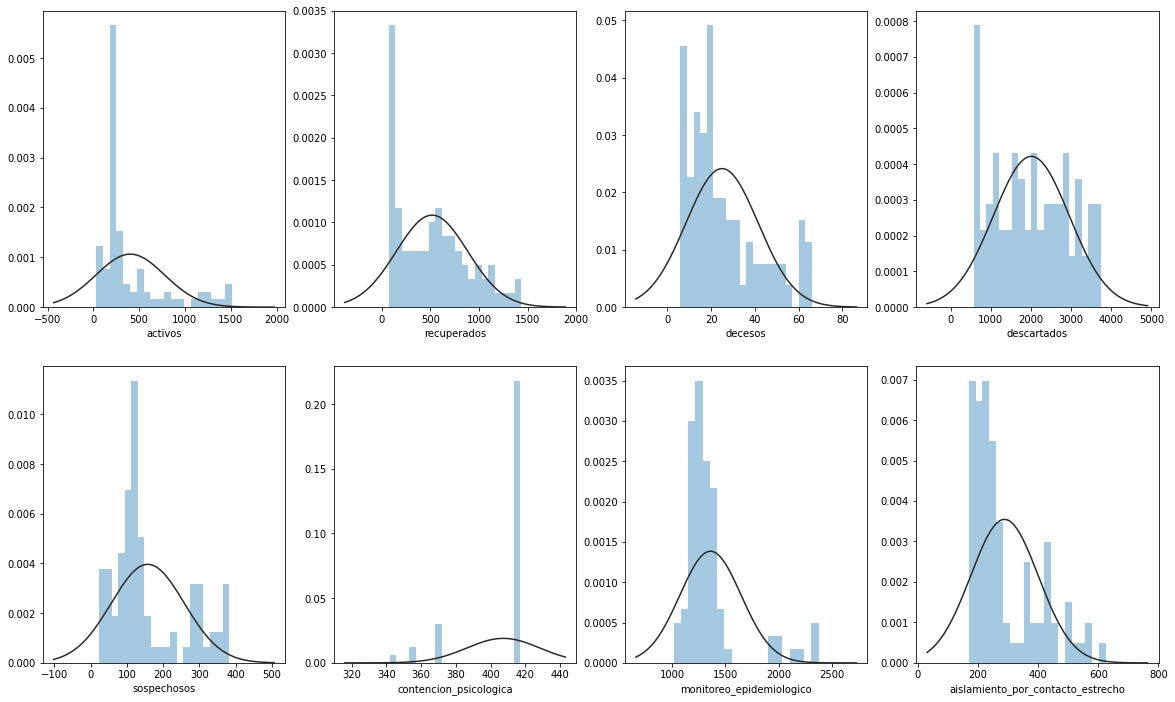

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20,12))

sns.distplot(casos["activos"], fit=norm , kde=False, bins=20, ax=axes[0,0])
sns.distplot(casos["recuperados"], fit=norm , kde=False, bins=20, ax=axes[0,1])
sns.distplot(casos["decesos"], fit=norm , kde=False, bins=20, ax=axes[0,2])
sns.distplot(casos["descartados"], fit=norm , kde=False, bins=20, ax=axes[0,3])
sns.distplot(casos["sospechosos"], fit=norm , kde=False, bins=20, ax=axes[1,0])
sns.distplot(casos["contencion_psicologica"], fit=norm , kde=False, bins=20, ax=axes[1,1])
sns.distplot(casos["monitoreo_epidemiologico"], fit=norm , kde=False, bins=20, ax=axes[1,2])
sns.distplot(casos["aislamiento_por_contacto_estrecho"], fit=norm , kde=False, bins=20, ax=axes[1,3])
#sns.distplot(casos["aprehendidos"], fit=norm , kde=False, bins=20, ax=axes[8])

Observo que ninguna de estas variables sigue una distribución normal. Veamos cuáles son acumulativas.

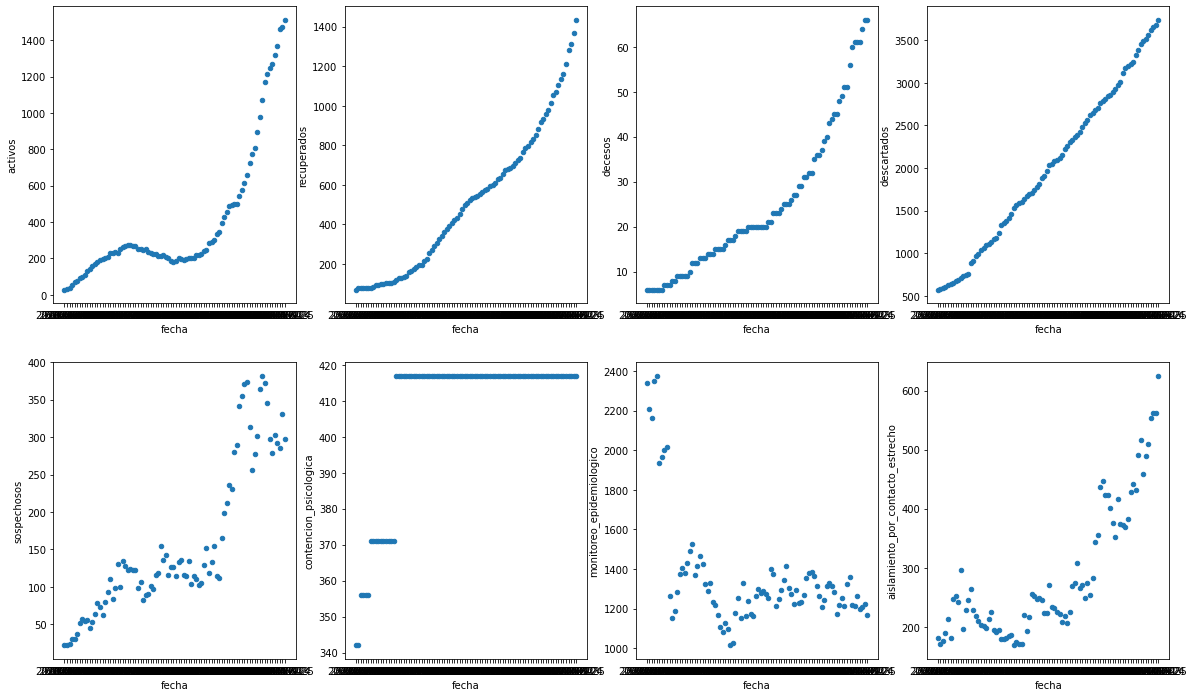

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20,12))

casos.plot.scatter(x="fecha",y="activos", ax=axes[0,0])
casos.plot.scatter(x="fecha",y="recuperados", ax=axes[0,1])
casos.plot.scatter(x="fecha",y="decesos", ax=axes[0,2])
casos.plot.scatter(x="fecha",y="descartados", ax=axes[0,3])
casos.plot.scatter(x="fecha",y="sospechosos", ax=axes[1,0])
casos.plot.scatter(x="fecha",y="contencion_psicologica", ax=axes[1,1])
casos.plot.scatter(x="fecha",y="monitoreo_epidemiologico", ax=axes[1,2])
casos.plot.scatter(x="fecha",y="aislamiento_por_contacto_estrecho", ax=axes[1,3])

Vemos que la variable "activos" no es acumulativa, si no que se está contando la cantidad de personas infectadas con posibilidad de contagiar. Aquellas que teóricamente han superado el período de contagio no están siendo contabilizadas. Esto lo infiero a partir del mínimo local que exhibe la curva de "activos". 

Las variables "recuperados" y "decesos" siguen un comportamiento muy parecido a lo que observamos con "confirmados". 

En la variable "contencion_psicologica" se ve un comportamiento particular, ya que sólo toma 4 valores distintos. Estos se mantienen constantes unos días para luego pegar un salto, cosa que ocurre en las primeras fechas hasta que alcanzado el 4to valor pareciera como si se hubiese dejado de contabilizar.

En "monitoreo_epidemiologico" veo una dispersión grande los primeros días para luego mantenerse aproximadamente constante. Y en "aislamiento_por_contacto_estrecho" observo que la curva se asemeja a la variable "sospechosos". Imagino que están muy relacionadas entre sí.

Me interesa analizar un poquito más qué pasa con la variable "descartados" ya que se observa un comportamiento lineanl y me genera la sospecha que los descartados por día sean constantes. También analizar la variable "sospechosos" debido a la gran dispersión en los datos.

In [14]:
descartados_por_dia = pd.Series(casos["descartados"])
# calculo la cantidad de descartados por día
for i in range(87,0,-1):
  descartados_por_dia[i] = descartados_por_dia[i] - descartados_por_dia[i-1]
# saco la primer fila
descartados_por_dia = descartados_por_dia[1:88]
sospechosos_por_dia = pd.Series(casos["sospechosos"])
# calculo la cantidad de descartados por día
for i in range(87,0,-1):
  sospechosos_por_dia[i] = sospechosos_por_dia[i] - sospechosos_por_dia[i-1]
# saco la primer fila
sospechosos_por_dia = sospechosos_por_dia[1:88]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


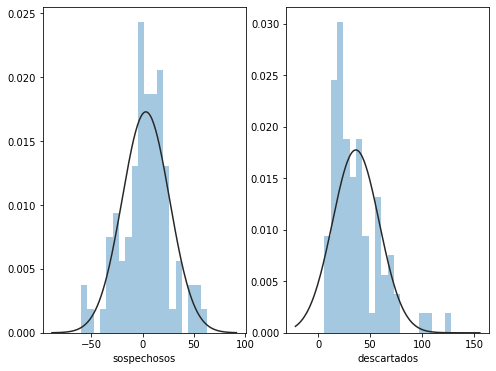

In [15]:
# Ahora realizo el histograma de la cantidad de descartados y sospechosos por día
fig, axes = plt.subplots(1, 2, figsize=(8,6))

sns.distplot(sospechosos_por_dia, fit=norm , kde=False, bins=20, ax=axes[0])
sns.distplot(descartados_por_dia, fit=norm , kde=False, bins=20, ax=axes[1])

Aquí se observa cómo los sospechosos por día siguen una distribución aproximadamente normal con los valores más probables alrededor del cero. No así para la variable de descartados por día.

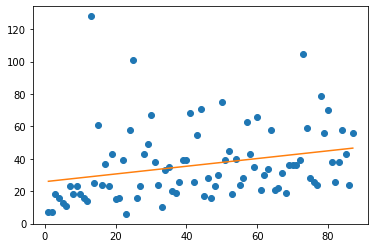

In [16]:
dias = np.array(dias)
descartados_por_dia = np.array(descartados_por_dia)
plt.plot(dias,descartados_por_dia,'o')
m, b = np.polyfit(dias, descartados_por_dia, 1)
plt.plot(dias,m*dias+b)

Del histograma se ve que no son constantes los descartados por día, y a partir del scatter plot veo que hay una leve tendencia al aumento de esta cantidad.

Vamos a realizar ahora el mismo análisis con el dataframe camas

In [17]:
camas.describe()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,70.670455,817.500000,350.159091,40.920455,162.068182,19.647727,34.909091,32.795455,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909
std,42.113072,155.002113,77.216502,9.006028,18.349603,6.586367,21.706843,15.509107,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,30.750000,848.000000,325.750000,38.000000,163.000000,15.750000,20.000000,22.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000
50%,87.500000,848.000000,367.500000,43.000000,163.000000,18.000000,25.000000,26.500000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000
75%,109.250000,848.000000,391.000000,46.000000,163.000000,23.000000,52.250000,44.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


In [18]:
camas.head()

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN


In [19]:
camas.dtypes

informeNumero                             int64
fecha                                    object
total_camas_hospitales                    int64
camas_ocupadas_hospitales                 int64
porcentaje_ocupacion_camas_hospitales     int64
camas_covid                               int64
camas_sospechosos_covid                   int64
camas_confirmados_covid                   int64
porcentaje_ocupacion_camas_covid          int64
uti_covid_totales                         int64
uti_covid_ocupadas                        int64
respiradores_totales                      int64
respiradores_ocupados                     int64
respiradores_covid_totales                int64
respiradores_covid_ocupados               int64
total_camas_ucma                          int64
total_camas_ocupadas_ucma                 int64
sedes_ucma                                int64
observaciones                            object
dtype: object

In [20]:
camas.count()

informeNumero                            88
fecha                                    88
total_camas_hospitales                   88
camas_ocupadas_hospitales                88
porcentaje_ocupacion_camas_hospitales    88
camas_covid                              88
camas_sospechosos_covid                  88
camas_confirmados_covid                  88
porcentaje_ocupacion_camas_covid         88
uti_covid_totales                        88
uti_covid_ocupadas                       88
respiradores_totales                     88
respiradores_ocupados                    88
respiradores_covid_totales               88
respiradores_covid_ocupados              88
total_camas_ucma                         88
total_camas_ocupadas_ucma                88
sedes_ucma                               88
observaciones                             8
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

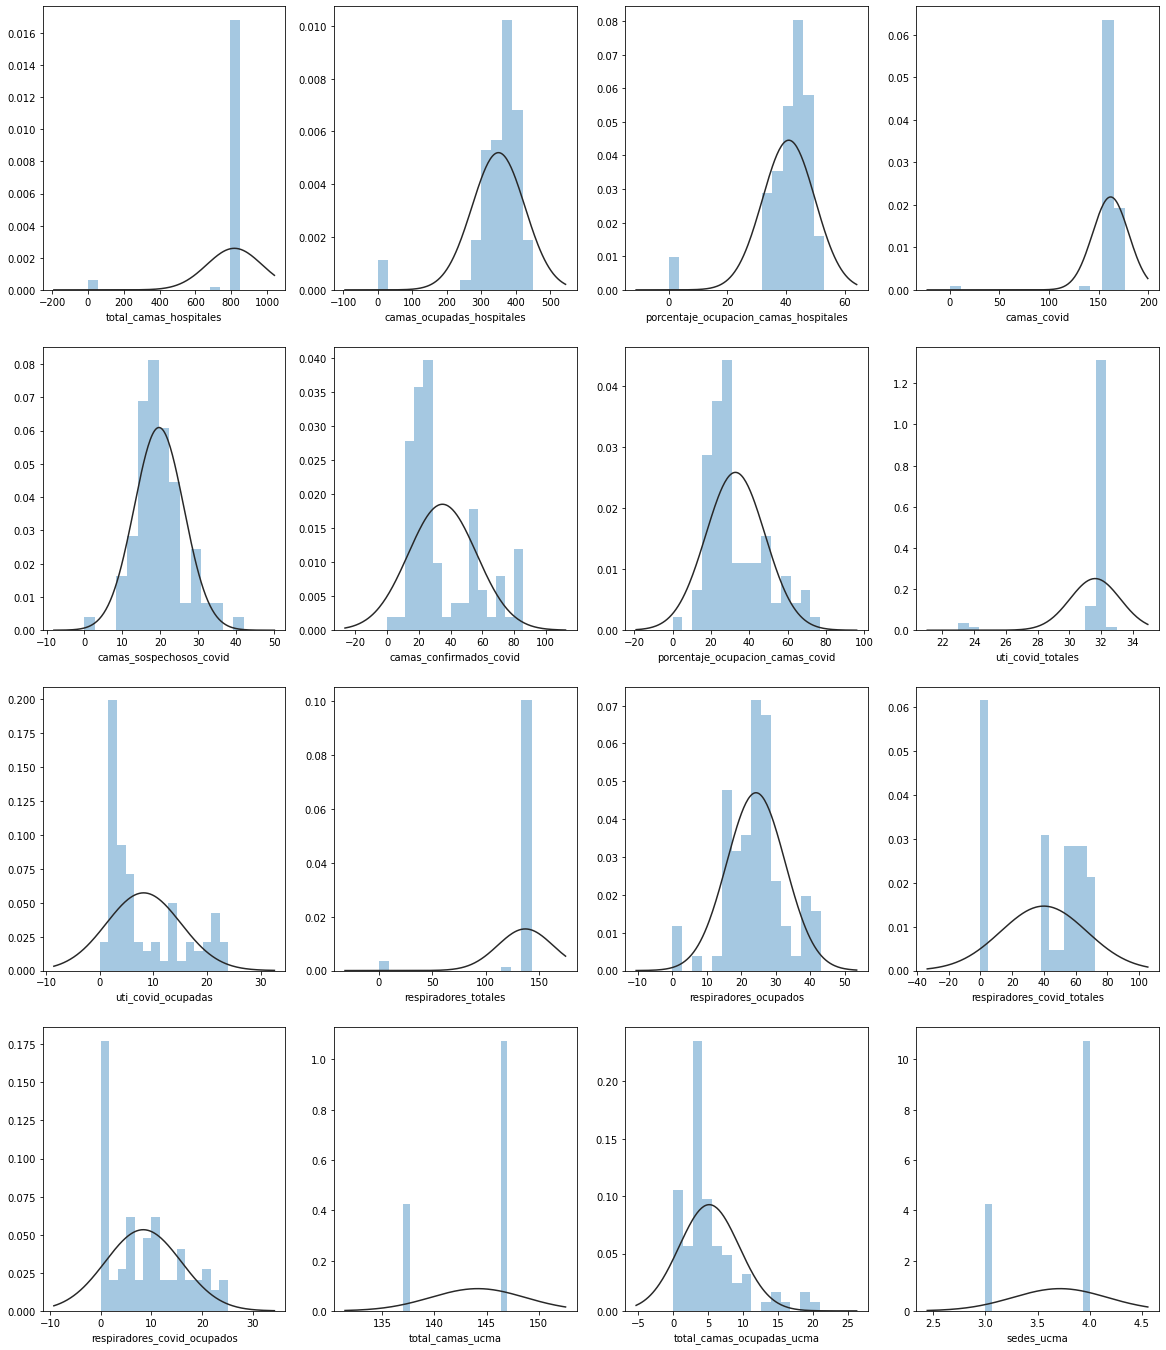

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(20,24))

sns.distplot(camas["total_camas_hospitales"], fit=norm , kde=False, bins=15, ax=axes[0,0])
sns.distplot(camas["camas_ocupadas_hospitales"], fit=norm , kde=False, bins=15, ax=axes[0,1])
sns.distplot(camas["porcentaje_ocupacion_camas_hospitales"], fit=norm , kde=False, bins=15, ax=axes[0,2])
sns.distplot(camas["camas_covid"], fit=norm , kde=False, bins=15, ax=axes[0,3])
sns.distplot(camas["camas_sospechosos_covid"], fit=norm , kde=False, bins=15, ax=axes[1,0])
sns.distplot(camas["camas_confirmados_covid"], fit=norm , kde=False, bins=15, ax=axes[1,1])
sns.distplot(camas["porcentaje_ocupacion_camas_covid"], fit=norm , kde=False, bins=15, ax=axes[1,2])
sns.distplot(camas["uti_covid_totales"], fit=norm , kde=False, bins=15, ax=axes[1,3])
sns.distplot(camas["uti_covid_ocupadas"], fit=norm , kde=False, bins=15, ax=axes[2,0])
sns.distplot(camas["respiradores_totales"], fit=norm , kde=False, bins=15, ax=axes[2,1])
sns.distplot(camas["respiradores_ocupados"], fit=norm , kde=False, bins=15, ax=axes[2,2])
sns.distplot(camas["respiradores_covid_totales"], fit=norm , kde=False, bins=15, ax=axes[2,3])
sns.distplot(camas["respiradores_covid_ocupados"], fit=norm , kde=False, bins=15, ax=axes[3,0])
sns.distplot(camas["total_camas_ucma"], fit=norm , kde=False, bins=15, ax=axes[3,1])
sns.distplot(camas["total_camas_ocupadas_ucma"], fit=norm , kde=False, bins=15, ax=axes[3,2])
sns.distplot(camas["sedes_ucma"], fit=norm , kde=False, bins=15, ax=axes[3,3])


Para este dataset, vemos que la variable "camas_sospechosos_covid" presenta una distribución normal con un pequeño sesgo hacia la izquierda, así también como la variable "respiradores_ocupados" pero con un sesgo hacia la derecha.